In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import gmaps

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



ModuleNotFoundError: No module named 'api_keys'

In [2]:
co2_data="co2_data2.csv"
temp_data="temp_data2.csv"

In [3]:
co2_df = pd.read_csv(co2_data, index_col=False) 
co2_df

,Unnamed: 0,Unnamed: 1,Annual CO2 emissions,Annual CO2 emissions.1,Annual CO2 emissions.2
0,NaN,NaN,mean,min,max
1,Decade,Entity,NaN,NaN,NaN
2,1900-1909,Brazil,2775313.4545454546,0.0,4198944.0
3,1910-1919,Brazil,3790041.6,2322976.0,6034608.0
4,1920-1929,Brazil,5110803.7,2890896.0,6345662.0
...,...,...,...,...,...
57,1970-1979,China,1179236869.1,874016359.0,1487113100.0
58,1980-1989,China,1982188428.5,1442782279.0,2420789420.0
59,1990-1999,China,3099854552.4,2538029952.0,3414549286.0
60,2000-2009,China,5943199928.2,3426143795.0,8500542695.0


In [4]:
temp_df = pd.read_csv(temp_data, index_col=False) 
temp_df

,Unnamed: 0,Unnamed: 1,AverageTemperature,AverageTemperature.1,AverageTemperature.2
0,NaN,NaN,mean,min,max
1,Decade,Country,NaN,NaN,NaN
2,1900-1909,Brazil,21.73123205922877,10.938,29.529
3,1910-1919,Brazil,21.785897878788003,9.954,29.777
4,1920-1929,Brazil,21.91573954545447,10.053,29.751
...,...,...,...,...,...
57,1970-1979,China,12.996214035087451,-30.628,31.314
58,1980-1989,China,13.1339636842109,-28.305,31.018
59,1990-1999,China,13.451248640350816,-28.604000000000006,30.858
60,2000-2009,China,13.769272302631457,-29.84,31.799


In [5]:
temp_df.drop([0, 1])

,Unnamed: 0,Unnamed: 1,AverageTemperature,AverageTemperature.1,AverageTemperature.2
2,1900-1909,Brazil,21.73123205922877,10.938,29.529
3,1910-1919,Brazil,21.785897878788003,9.954,29.777
4,1920-1929,Brazil,21.91573954545447,10.053,29.751
5,1930-1939,Brazil,22.087598181819033,10.52,29.851
6,1940-1949,Brazil,22.017489621212004,9.591,29.535
7,1950-1959,Brazil,22.129006969696405,9.736,29.55
8,1960-1969,Brazil,22.194913030302846,10.477,29.966
9,1970-1979,Brazil,22.21653219696955,10.59,30.013
10,1980-1989,Brazil,22.440585378787784,10.884,30.042
11,1990-1999,Brazil,22.684991249999943,10.348,30.495


In [6]:
main_countries_df = temp_df.rename(columns = {'Unnamed: 0': 'Decade', 'Unnamed: 1': 'Entity', 'Annual CO2 emissions':'Annual CO2 emissions',
                                     'Annual CO2 emissions.1':'Min CO2 Emmissions', 'Annual CO2 emissions.2':'Max CO2 Emissions'}, inplace = False)
main_countries_df

,Decade,Entity,AverageTemperature,AverageTemperature.1,AverageTemperature.2
0,NaN,NaN,mean,min,max
1,Decade,Country,NaN,NaN,NaN
2,1900-1909,Brazil,21.73123205922877,10.938,29.529
3,1910-1919,Brazil,21.785897878788003,9.954,29.777
4,1920-1929,Brazil,21.91573954545447,10.053,29.751
...,...,...,...,...,...
57,1970-1979,China,12.996214035087451,-30.628,31.314
58,1980-1989,China,13.1339636842109,-28.305,31.018
59,1990-1999,China,13.451248640350816,-28.604000000000006,30.858
60,2000-2009,China,13.769272302631457,-29.84,31.799


In [7]:
main_countries_df.rename(columns={'Entity': 'Country', 'AverageTemperature': 'Avg Temp', 'AverageTemperature.1':'Min Temp',
                                 'AverageTemperature.2':'Max Temp'}, inplace=True)
main_countries_df

,Decade,Country,Avg Temp,Min Temp,Max Temp
0,NaN,NaN,mean,min,max
1,Decade,Country,NaN,NaN,NaN
2,1900-1909,Brazil,21.73123205922877,10.938,29.529
3,1910-1919,Brazil,21.785897878788003,9.954,29.777
4,1920-1929,Brazil,21.91573954545447,10.053,29.751
...,...,...,...,...,...
57,1970-1979,China,12.996214035087451,-30.628,31.314
58,1980-1989,China,13.1339636842109,-28.305,31.018
59,1990-1999,China,13.451248640350816,-28.604000000000006,30.858
60,2000-2009,China,13.769272302631457,-29.84,31.799


In [8]:
main_countries_df.drop([0, 1])

,Decade,Country,Avg Temp,Min Temp,Max Temp
2,1900-1909,Brazil,21.73123205922877,10.938,29.529
3,1910-1919,Brazil,21.785897878788003,9.954,29.777
4,1920-1929,Brazil,21.91573954545447,10.053,29.751
5,1930-1939,Brazil,22.087598181819033,10.52,29.851
6,1940-1949,Brazil,22.017489621212004,9.591,29.535
7,1950-1959,Brazil,22.129006969696405,9.736,29.55
8,1960-1969,Brazil,22.194913030302846,10.477,29.966
9,1970-1979,Brazil,22.21653219696955,10.59,30.013
10,1980-1989,Brazil,22.440585378787784,10.884,30.042
11,1990-1999,Brazil,22.684991249999943,10.348,30.495


In [9]:
co2_df.rename(columns={'Unnamed: 0': 'Decade', 'Unnamed: 1': 'Country','Annual CO2 emissions': 'Avg CO2 Emmissions', 'Annual CO2 emissions.1':'Min CO2 Emissions',
                                 'Annual CO2 emissions.2':'Max CO2 Emissions'}, inplace=True)
co2_df

,Decade,Country,Avg CO2 Emmissions,Min CO2 Emissions,Max CO2 Emissions
0,NaN,NaN,mean,min,max
1,Decade,Entity,NaN,NaN,NaN
2,1900-1909,Brazil,2775313.4545454546,0.0,4198944.0
3,1910-1919,Brazil,3790041.6,2322976.0,6034608.0
4,1920-1929,Brazil,5110803.7,2890896.0,6345662.0
...,...,...,...,...,...
57,1970-1979,China,1179236869.1,874016359.0,1487113100.0
58,1980-1989,China,1982188428.5,1442782279.0,2420789420.0
59,1990-1999,China,3099854552.4,2538029952.0,3414549286.0
60,2000-2009,China,5943199928.2,3426143795.0,8500542695.0


In [10]:
co2_df.drop([0, 1])

,Decade,Country,Avg CO2 Emmissions,Min CO2 Emissions,Max CO2 Emissions
2,1900-1909,Brazil,2775313.4545454546,0.0,4198944.0
3,1910-1919,Brazil,3790041.6,2322976.0,6034608.0
4,1920-1929,Brazil,5110803.7,2890896.0,6345662.0
5,1930-1939,Brazil,5295288.6,4168949.0,6485943.0
6,1940-1949,Brazil,8262202.0,5866699.0,19659072.0
7,1950-1959,Brazil,33301678.3,21659348.0,46851821.0
8,1960-1969,Brazil,65654880.0,49144503.0,93530488.0
9,1970-1979,Brazil,150715419.3,102357941.0,187155078.0
10,1980-1989,Brazil,188383925.2,165426937.0,212113644.0
11,1990-1999,Brazil,268559256.1,217227661.0,324226040.0


In [11]:
combined_df=co2_df.merge(main_countries_df, on=['Decade', 'Country'])
combined_df

,Decade,Country,Avg CO2 Emmissions,Min CO2 Emissions,Max CO2 Emissions,Avg Temp,Min Temp,Max Temp
0,NaN,NaN,mean,min,max,mean,min,max
1,1900-1909,Brazil,2775313.4545454546,0.0,4198944.0,21.73123205922877,10.938,29.529
2,1910-1919,Brazil,3790041.6,2322976.0,6034608.0,21.785897878788003,9.954,29.777
3,1920-1929,Brazil,5110803.7,2890896.0,6345662.0,21.91573954545447,10.053,29.751
4,1930-1939,Brazil,5295288.6,4168949.0,6485943.0,22.087598181819033,10.52,29.851
...,...,...,...,...,...,...,...,...
56,1970-1979,China,1179236869.1,874016359.0,1487113100.0,12.996214035087451,-30.628,31.314
57,1980-1989,China,1982188428.5,1442782279.0,2420789420.0,13.1339636842109,-28.305,31.018
58,1990-1999,China,3099854552.4,2538029952.0,3414549286.0,13.451248640350816,-28.604000000000006,30.858
59,2000-2009,China,5943199928.2,3426143795.0,8500542695.0,13.769272302631457,-29.84,31.799


In [12]:
combined_df.drop([0])

,Decade,Country,Avg CO2 Emmissions,Min CO2 Emissions,Max CO2 Emissions,Avg Temp,Min Temp,Max Temp
1,1900-1909,Brazil,2775313.4545454546,0.0,4198944.0,21.73123205922877,10.938,29.529
2,1910-1919,Brazil,3790041.6,2322976.0,6034608.0,21.785897878788003,9.954,29.777
3,1920-1929,Brazil,5110803.7,2890896.0,6345662.0,21.91573954545447,10.053,29.751
4,1930-1939,Brazil,5295288.6,4168949.0,6485943.0,22.087598181819033,10.52,29.851
5,1940-1949,Brazil,8262202.0,5866699.0,19659072.0,22.017489621212004,9.591,29.535
6,1950-1959,Brazil,33301678.3,21659348.0,46851821.0,22.129006969696405,9.736,29.55
7,1960-1969,Brazil,65654880.0,49144503.0,93530488.0,22.194913030302846,10.477,29.966
8,1970-1979,Brazil,150715419.3,102357941.0,187155078.0,22.21653219696955,10.59,30.013
9,1980-1989,Brazil,188383925.2,165426937.0,212113644.0,22.440585378787784,10.884,30.042
10,1990-1999,Brazil,268559256.1,217227661.0,324226040.0,22.684991249999943,10.348,30.495


In [13]:
combined_df[['Decade']] = combined_df[['Decade']].astype('object')


In [14]:
combined_df[['Start', 'Finish']] = combined_df['Decade'].str.split('-', expand=True)
combined_df

,Decade,Country,Avg CO2 Emmissions,Min CO2 Emissions,Max CO2 Emissions,Avg Temp,Min Temp,Max Temp,Start,Finish
0,NaN,NaN,mean,min,max,mean,min,max,NaN,NaN
1,1900-1909,Brazil,2775313.4545454546,0.0,4198944.0,21.73123205922877,10.938,29.529,1900,1909
2,1910-1919,Brazil,3790041.6,2322976.0,6034608.0,21.785897878788003,9.954,29.777,1910,1919
3,1920-1929,Brazil,5110803.7,2890896.0,6345662.0,21.91573954545447,10.053,29.751,1920,1929
4,1930-1939,Brazil,5295288.6,4168949.0,6485943.0,22.087598181819033,10.52,29.851,1930,1939
...,...,...,...,...,...,...,...,...,...,...
56,1970-1979,China,1179236869.1,874016359.0,1487113100.0,12.996214035087451,-30.628,31.314,1970,1979
57,1980-1989,China,1982188428.5,1442782279.0,2420789420.0,13.1339636842109,-28.305,31.018,1980,1989
58,1990-1999,China,3099854552.4,2538029952.0,3414549286.0,13.451248640350816,-28.604000000000006,30.858,1990,1999
59,2000-2009,China,5943199928.2,3426143795.0,8500542695.0,13.769272302631457,-29.84,31.799,2000,2009


In [15]:
combined2_df=combined_df.drop([0, 1])

In [16]:
combined3_df=combined2_df.drop(columns=['Finish', 'Decade'])

In [17]:
combined3_df.rename(columns={"Start": "Decade"})

,Country,Avg CO2 Emmissions,Min CO2 Emissions,Max CO2 Emissions,Avg Temp,Min Temp,Max Temp,Decade
2,Brazil,3790041.6,2322976.0,6034608.0,21.785897878788003,9.954,29.777,1910
3,Brazil,5110803.7,2890896.0,6345662.0,21.91573954545447,10.053,29.751,1920
4,Brazil,5295288.6,4168949.0,6485943.0,22.087598181819033,10.52,29.851,1930
5,Brazil,8262202.0,5866699.0,19659072.0,22.017489621212004,9.591,29.535,1940
6,Brazil,33301678.3,21659348.0,46851821.0,22.129006969696405,9.736,29.55,1950
7,Brazil,65654880.0,49144503.0,93530488.0,22.194913030302846,10.477,29.966,1960
8,Brazil,150715419.3,102357941.0,187155078.0,22.21653219696955,10.59,30.013,1970
9,Brazil,188383925.2,165426937.0,212113644.0,22.440585378787784,10.884,30.042,1980
10,Brazil,268559256.1,217227661.0,324226040.0,22.684991249999943,10.348,30.495,1990
11,Brazil,350423298.7,317508303.0,411240192.0,22.954352878787287,10.834,30.332,2000


In [18]:
combined3_df.info

<bound method DataFrame.info of           Country  Avg CO2 Emmissions Min CO2 Emissions   Max CO2 Emissions  \
2          Brazil           3790041.6         2322976.0           6034608.0   
3          Brazil           5110803.7         2890896.0           6345662.0   
4          Brazil           5295288.6         4168949.0           6485943.0   
5          Brazil           8262202.0         5866699.0          19659072.0   
6          Brazil          33301678.3        21659348.0          46851821.0   
7          Brazil          65654880.0        49144503.0          93530488.0   
8          Brazil         150715419.3       102357941.0         187155078.0   
9          Brazil         188383925.2       165426937.0         212113644.0   
10         Brazil         268559256.1       217227661.0         324226040.0   
11         Brazil         350423298.7       317508303.0         411240192.0   
12         Brazil   477734208.7777778       429959368.0  523894030.00000006   
13          India  1

In [19]:
combined3_df['Start'] =  pd.to_datetime(combined3_df['Start'], format='%Y').dt.year

In [20]:
combined4_df = combined3_df[['Country', 'Start','Avg CO2 Emmissions', 'Min CO2 Emissions', 'Max CO2 Emissions', 'Avg Temp', 'Min Temp', 'Max Temp']]

In [21]:
combined5_df=combined4_df.rename(columns={"Start": "Decade"})
combined5_df

,Country,Decade,Avg CO2 Emmissions,Min CO2 Emissions,Max CO2 Emissions,Avg Temp,Min Temp,Max Temp
2,Brazil,1910,3790041.6,2322976.0,6034608.0,21.785897878788003,9.954,29.777
3,Brazil,1920,5110803.7,2890896.0,6345662.0,21.91573954545447,10.053,29.751
4,Brazil,1930,5295288.6,4168949.0,6485943.0,22.087598181819033,10.52,29.851
5,Brazil,1940,8262202.0,5866699.0,19659072.0,22.017489621212004,9.591,29.535
6,Brazil,1950,33301678.3,21659348.0,46851821.0,22.129006969696405,9.736,29.55
7,Brazil,1960,65654880.0,49144503.0,93530488.0,22.194913030302846,10.477,29.966
8,Brazil,1970,150715419.3,102357941.0,187155078.0,22.21653219696955,10.59,30.013
9,Brazil,1980,188383925.2,165426937.0,212113644.0,22.440585378787784,10.884,30.042
10,Brazil,1990,268559256.1,217227661.0,324226040.0,22.684991249999943,10.348,30.495
11,Brazil,2000,350423298.7,317508303.0,411240192.0,22.954352878787287,10.834,30.332


In [22]:
combined5_df['Avg CO2 Emmissions'] = combined5_df['Avg CO2 Emmissions'].astype(float)

In [23]:
combined5_df['Decade'] = combined5_df['Decade'].astype(float)

In [24]:
groupby_df = combined5_df.groupby(['Decade'])
groupby_df.head()

,Country,Decade,Avg CO2 Emmissions,Min CO2 Emissions,Max CO2 Emissions,Avg Temp,Min Temp,Max Temp
2,Brazil,1910.0,3.790042e+06,2322976.0,6034608.0,21.785897878788003,9.954,29.777
3,Brazil,1920.0,5.110804e+06,2890896.0,6345662.0,21.91573954545447,10.053,29.751
4,Brazil,1930.0,5.295289e+06,4168949.0,6485943.0,22.087598181819033,10.52,29.851
5,Brazil,1940.0,8.262202e+06,5866699.0,19659072.0,22.017489621212004,9.591,29.535
6,Brazil,1950.0,3.330168e+07,21659348.0,46851821.0,22.129006969696405,9.736,29.55
7,Brazil,1960.0,6.565488e+07,49144503.0,93530488.0,22.194913030302846,10.477,29.966
8,Brazil,1970.0,1.507154e+08,102357941.0,187155078.0,22.21653219696955,10.59,30.013
9,Brazil,1980.0,1.883839e+08,165426937.0,212113644.0,22.440585378787784,10.884,30.042
10,Brazil,1990.0,2.685593e+08,217227661.0,324226040.0,22.684991249999943,10.348,30.495
11,Brazil,2000.0,3.504233e+08,317508303.0,411240192.0,22.954352878787287,10.834,30.332


In [25]:
avg_co2=groupby_df["Avg CO2 Emmissions"].mean()

In [26]:
avg_co2

Decade
1900.0    2.621218e+08
1910.0    3.206175e+08
1920.0    3.757879e+08
1930.0    3.724743e+08
1940.0    5.457649e+08
1950.0    7.621595e+08
1960.0    1.082803e+09
1970.0    1.613562e+09
1980.0    1.902408e+09
1990.0    2.276344e+09
2000.0    3.013239e+09
2010.0    3.906929e+09
Name: Avg CO2 Emmissions, dtype: float64

NameError: name 'plot' is not defined

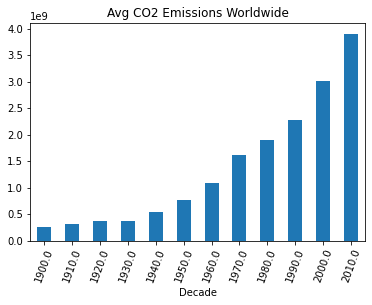

In [27]:
avg_co2.plot.bar(x="Decade", y="Avg CO2 Emmissions", rot=70, title="Avg CO2 Emissions Worldwide");

plot.show(block=True);

In [29]:
combined5_df['Avg Temp'] = combined5_df['Avg Temp'].astype(float)

In [30]:
avg_temp=groupby_df["Avg Temp"].mean()
avg_temp

Decade
1900.0    13.693807
1910.0    15.276555
1920.0    15.499192
1930.0    15.657574
1940.0    15.630058
1950.0    15.701502
1960.0    15.662225
1970.0    15.748892
1980.0    15.990802
1990.0    16.209981
2000.0    16.542056
2010.0    16.667243
Name: Avg Temp, dtype: float64

NameError: name 'plot' is not defined

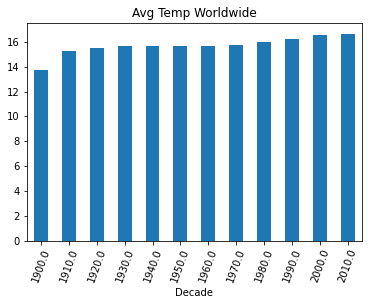

In [31]:
avg_temp.plot.bar(x="Decade", y="Avg Temp", rot=70, title="Avg Temp Worldwide");

plot.show(block=True);

In [32]:
combined5_df['Country'] = combined5_df['Country'].astype(object)

In [34]:
combined5_df.set_index('Country', inplace=True)

In [39]:
scatter_us = combined5_df.loc[["United States"], ["Avg CO2 Emmissions", "Decade"]]
scatter_us

,Avg CO2 Emmissions,Decade
Country,,
United States,9.697364e+08,1900.0
United States,1.493924e+09,1910.0
United States,1.753823e+09,1920.0
United States,1.556552e+09,1930.0
United States,2.330513e+09,1940.0
United States,2.710035e+09,1950.0
United States,3.504613e+09,1960.0
United States,4.650222e+09,1970.0
United States,4.625146e+09,1980.0


The r-squared is: 0.9468351668274847


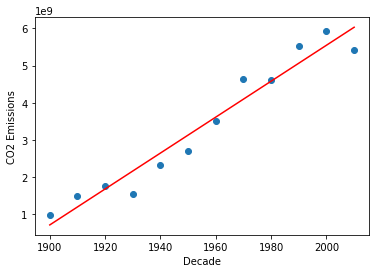

In [41]:
x_values = scatter_us['Decade']
y_values = scatter_us['Avg CO2 Emmissions']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Decade')
plt.ylabel('CO2 Emissions')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [61]:
combined5_df.set_index('Country')

KeyError: "None of ['Country'] are in the columns"